In [212]:
#import statements

import pandas as pd
import numpy as np

In [213]:
#Read the training dataset
train_df = pd.read_csv("car-mpg.csv")

In [214]:
#inspect the model of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [215]:
#Notice hp horse power as object? Let us inspect the data
train_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [216]:
#Value of hp looks numeric but why did pandas read as Object?
train_df.groupby(by=['hp']).count().tail()

#Notice the ? mark? Missing values! It now makes sense why pandas
#read as Object. We will treat the missing values in hp bit later

,mpg,cyl,disp,wt,acc,yr,origin,car_type,car_name
hp,,,,,,,,,
95,14,14,14,14,14,14,14,14,14
96,3,3,3,3,3,3,3,3,3
97,9,9,9,9,9,9,9,9,9
98,2,2,2,2,2,2,2,2,2
?,6,6,6,6,6,6,6,6,6


In [217]:
#Study IQR in this dataset for all features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [218]:
#Total no of records is 398
#No of cylinders look alright - between 3 and 8. No ZEROs, almost certain no outliers
#In Disp, median < mean, possible outlier
#Wt median < mean, possible outlier
#Acc seems alright, mean ~ median
#Yr looks like year of manufacturing, No ZEROs seems alright
#Origin seems like 3 countries, It is 1) America, 2) Europe and 3)Asia from dataset
#car type - no idea, it seems categorical 0 and 1
#carname - we can drop, not significant for model

In [219]:
train_df.groupby(by='origin').count()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name
origin,,,,,,,,,
1,249,249,249,249,249,249,249,249,249
2,70,70,70,70,70,70,70,70,70
3,79,79,79,79,79,79,79,79,79


In [220]:
#Meaningful labels for One Hot Encoding during modeling
train_df['origin'] = train_df['origin'].replace({1: 'America', 2: 'Europe', 3: 'Asia'})

In [221]:
train_df.groupby(by='origin').count()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name
origin,,,,,,,,,
America,249,249,249,249,249,249,249,249,249
Asia,79,79,79,79,79,79,79,79,79
Europe,70,70,70,70,70,70,70,70,70


In [222]:
#Let us try to visualize

import seaborn as sns
sns.set(color_codes=True)

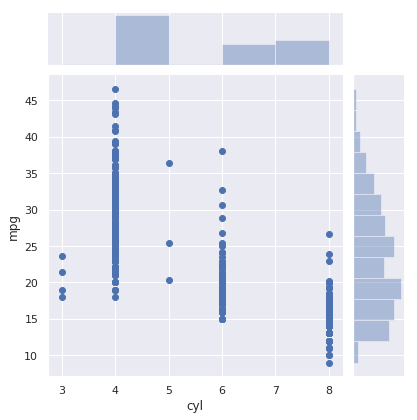

In [223]:
#mpg vs cyl
sns.jointplot(train_df['cyl'], train_df['mpg'])
#mpg is obviously looking greater for 4 cylinders Vs 8 Cylinders

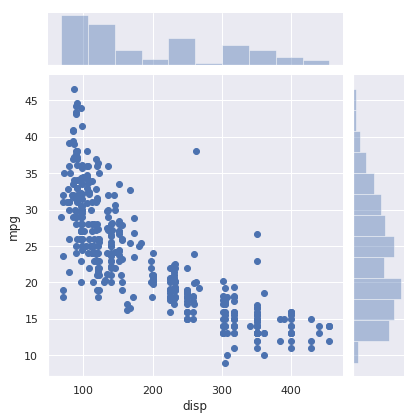

In [224]:
#mpg vs disp
sns.jointplot(train_df['disp'], train_df['mpg'])
#mpg is having non liner relation with mpg & coefficient seems negative
# i.e. mpg increase with decrease in disp

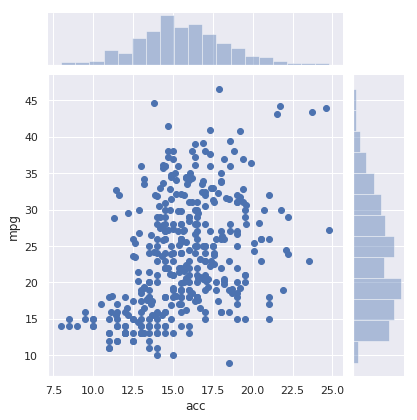

In [225]:
#mpg vs acc
sns.jointplot(train_df['acc'], train_df['mpg'])
#mpg seems to have positive impact with acc

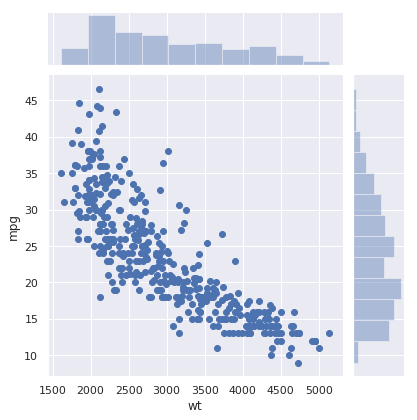

In [226]:
#mpg vs wt
sns.jointplot(train_df['wt'], train_df['mpg'])
#mpg is similar to disp, inversely relational non linear

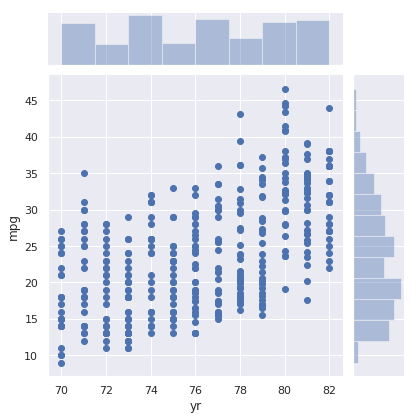

In [227]:
#mpg vs yr
sns.jointplot(train_df['yr'], train_df['mpg'])
#mpg is looking better in latest year manufactured cars

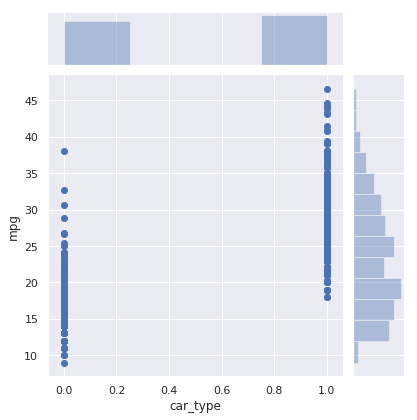

In [228]:
#mpg vs car type
sns.jointplot(train_df['car_type'], train_df['mpg'])
#mpg is better for car type 1

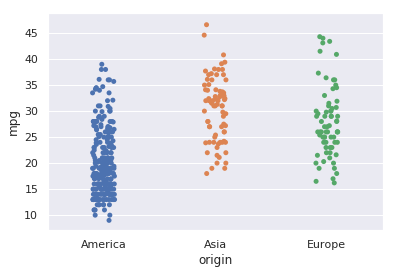

In [229]:
#mpg vs origin
sns.stripplot(train_df['origin'], train_df['mpg'])
#mpg is looks better for Asia manufactured cars and European ones

In [230]:
train_df[train_df.hp == '?'].hp

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

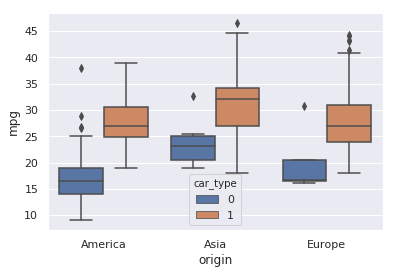

In [231]:
#Some more visualization to explore the data
sns.boxplot(train_df['origin'], train_df['mpg'], hue=train_df['car_type'])

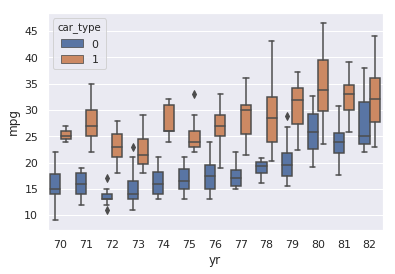

In [232]:
#Some more visualization to explore the data
sns.boxplot(train_df['yr'], train_df['mpg'], hue=train_df['car_type'])

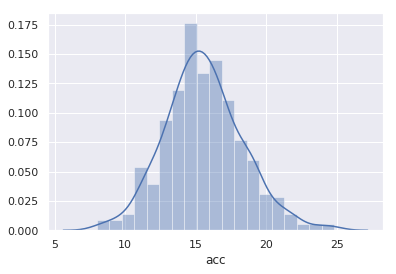

In [233]:
#Let us look for outlier possibility in disp and acc
sns.distplot(train_df['acc'], kde=True);



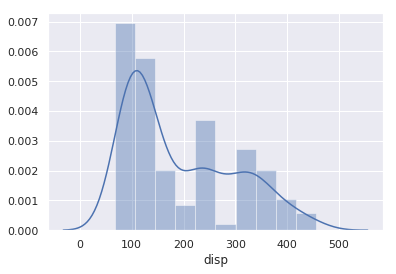

In [234]:
sns.distplot(train_df['disp'], kde=True);
# There are outliers in both acc and disp, 
#but we can still move forward with modeling to see how much of impact are these really

In [235]:
train_df.query('hp != "?"').max()
#You can see max value of hp is 98
#so going to replace ? with 999 for bivariate analysis

mpg                     46.6
cyl                        8
disp                     455
hp                        98
wt                      5140
acc                     24.8
yr                        82
origin                Europe
car_type                   1
car_name    vw rabbit custom
dtype: object

In [236]:
train_df['hp'] = train_df['hp'].replace({ '?' : 999 })

In [237]:
train_df.query('hp == 999').count()
#Only 6 records are missing

mpg         6
cyl         6
disp        6
hp          6
wt          6
acc         6
yr          6
origin      6
car_type    6
car_name    6
dtype: int64

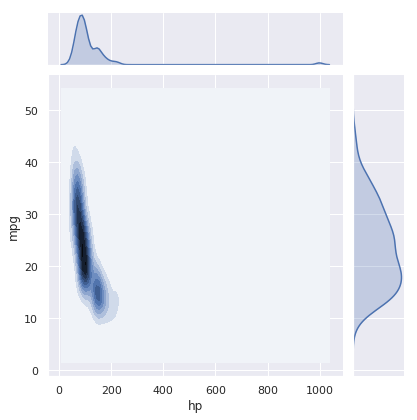

In [238]:
#mpg vs car type
sns.jointplot(train_df['hp'].astype('float64'), train_df['mpg'], kind="kde")
#Ignore the 999 for moment
#From the rest, mpg is better in lower horse power cars!

In [239]:
train_df['hp'] = train_df['hp'].astype('float64')
train_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')

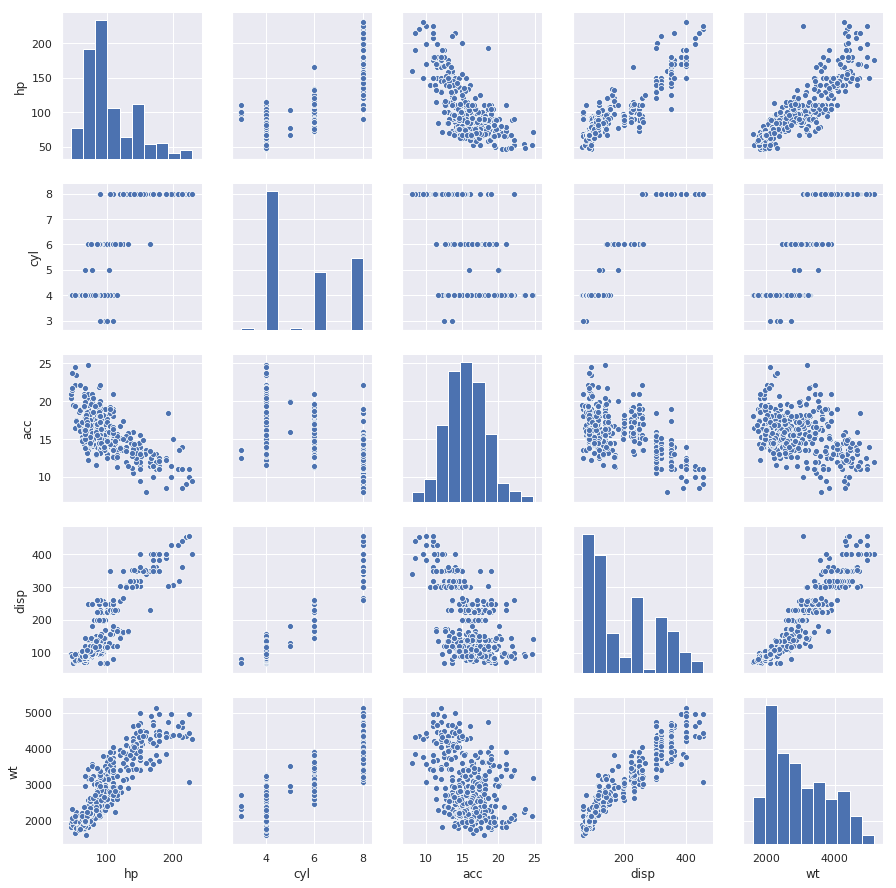

In [240]:
#ANALYZE FROM BELOW WHETHER HP MISSING VALUE CAN BE PREDICTED
#FROM REGRESSION MODEL WITH INFLUENCING FEATURES

imp_df = train_df[train_df.hp != 999].copy()

sns.pairplot(imp_df[['hp', 'cyl', 'acc', 'disp', 'wt']])

In [241]:
imp_df.count()

mpg         392
cyl         392
disp        392
hp          392
wt          392
acc         392
yr          392
origin      392
car_type    392
car_name    392
dtype: int64

In [242]:
#My Assumption : acc is kind of non linear wrt hp, wt and disp is kind of linear wrt hp
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_acc = imp_df.iloc[:,5].values
X_train_acc = X_train_acc.reshape(392,1)
print("Shape before polytransform of acc : ",X_train_acc.shape)
X_train_acc = poly.fit_transform(X_train_acc)
print("Shape after polytransform of acc : ",X_train_acc.shape)

Shape before polytransform of acc :  (392, 1)
Shape after polytransform of acc :  (392, 3)


In [243]:
imp_df.reset_index(inplace=True)
imp_df.tail()

,index,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
387,393,27.0,4,140.0,86.0,2790,15.6,82,America,1,ford mustang gl
388,394,44.0,4,97.0,52.0,2130,24.6,82,Europe,1,vw pickup
389,395,32.0,4,135.0,84.0,2295,11.6,82,America,1,dodge rampage
390,396,28.0,4,120.0,79.0,2625,18.6,82,America,1,ford ranger
391,397,31.0,4,119.0,82.0,2720,19.4,82,America,1,chevy s-10


In [244]:
X_train_acc

array([[  1.  ,  12.  , 144.  ],
       [  1.  ,  11.5 , 132.25],
       [  1.  ,  11.  , 121.  ],
       ...,
       [  1.  ,  11.6 , 134.56],
       [  1.  ,  18.6 , 345.96],
       [  1.  ,  19.4 , 376.36]])

In [245]:

y_hp = imp_df['hp'].values
imp_df.drop(columns=['mpg','acc','yr','origin', 'car_type', 'car_name', 'hp', 'index'], axis=1, inplace=True)

In [246]:
imp_df.tail()

,cyl,disp,wt
387,4,140.0,2790
388,4,97.0,2130
389,4,135.0,2295
390,4,120.0,2625
391,4,119.0,2720


In [247]:
temp_df = pd.DataFrame(data=X_train_acc)
temp_df.tail()

,0,1,2
387,1.0,15.6,243.36
388,1.0,24.6,605.16
389,1.0,11.6,134.56
390,1.0,18.6,345.96
391,1.0,19.4,376.36


In [248]:
imp_df = pd.concat([imp_df, temp_df], axis=1)
imp_df.tail()

,cyl,disp,wt,0,1,2
387,4,140.0,2790,1.0,15.6,243.36
388,4,97.0,2130,1.0,24.6,605.16
389,4,135.0,2295,1.0,11.6,134.56
390,4,120.0,2625,1.0,18.6,345.96
391,4,119.0,2720,1.0,19.4,376.36


In [249]:
X_hp = imp_df.iloc[:].values

In [250]:
X_hp.shape

(392, 6)

In [251]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#Train the predictor model to predict missing values of hp feature

X_train, X_test, y_train, y_test = train_test_split(X_hp, y_hp, test_size=0.20, random_state=1)
hp_predictor = LinearRegression()
hp_predictor.fit(X_train, y_train)

print("Train Score : ", hp_predictor.score(X_train, y_train))
print("Test Score : ", hp_predictor.score(X_test, y_test))

Train Score :  0.8974619219402709
Test Score :  0.8861114922672422


In [252]:
train_df['hp'] = train_df['hp'].replace({999 : np.NAN})

In [327]:
#index 32, 126, 330,, 336, 354, 374 is having HP as NULL values
null_hpdf = train_df[train_df.hp.isnull()].copy()
null_hpdf

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,America,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,America,0,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,Europe,1,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,America,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,Europe,1,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,America,1,amc concord dl


In [332]:
def impute_hp(cyl, disp, wt, acc) :
    # Do the poly transform first, append to hp inputs and pass to hp predictor
    print("Input 1 : ", cyl, disp, wt, acc)
    acc_poly = poly.transform((np.array(acc)).reshape(-1,1))
    input_list = [cyl, disp, wt]
    input_list = input_list + acc_poly[0].tolist()
    input_list = np.asarray(input_list)
    hp_missing = hp_predictor.predict([input_list])
    
    return hp_missing

In [317]:
#test case for missin hp inputs
print ("test case 1 : \n", impute_hp(4,98,2046,19.0))
print ("test case 2 : \n", impute_hp(4,140,2905,14.3))
print ("test case 1 : \n", impute_hp(4,140,2790,15.6))

test case 1 : 
 [57.44721251]
test case 2 : 
 [107.07088862]
test case 1 : 
 [95.18956924]


In [338]:
train_df[train_df.hp.isnull()].apply(lambda x: impute_hp(x['cyl'], x['disp'], x['wt'], x['acc']), axis = 1)
 #train_df.hp.fillna(value=impute_hp(train_df.cyl, train_df.disp, train_df.wt, train_df.acc))                                               

Input 1 :  4 98.0 2046 19.0
Input 1 :  4 98.0 2046 19.0
Input 1 :  6 200.0 2875 17.0
Input 1 :  4 85.0 1835 17.3
Input 1 :  4 140.0 2905 14.3
Input 1 :  4 100.0 2320 15.8
Input 1 :  4 151.0 3035 20.5


32      [57.44721251244911]
126     [90.20417351183664]
330    [57.407037617528715]
336     [107.0708886244968]
354     [79.63960096608932]
374     [83.82105681780124]
dtype: object

In [339]:
hp_predictor.score(X_test, y_test)

0.8861114922672422

In [ ]:
train_df.query('hp == 999')